In [85]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [329]:
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, roc_auc_score

# Carga inical

Link dataset kaggle (https://www.kaggle.com/datasets/whenamancodes/student-performance)

In [87]:
dataset_original = pd.read_csv("./archivos/Portuguese.csv")
dataset_original

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,4,0,11,11
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,2,9,11,11
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,6,12,13,12
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,0,14,14,14
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,0,11,13,13
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
644,MS,F,19,R,GT3,T,2,3,services,other,...,5,4,2,1,2,5,4,10,11,10
645,MS,F,18,U,LE3,T,3,1,teacher,services,...,4,3,4,1,1,1,4,15,15,16
646,MS,F,18,U,GT3,T,1,1,other,other,...,1,1,1,1,1,5,6,11,12,9
647,MS,M,17,U,LE3,T,3,1,services,services,...,2,4,5,3,4,2,6,10,10,10


La variable que interesa predecir o determinar es "school", esta variable determina cual es la escuela del estudiante.

In [95]:
target = "school"

# Análisis

#### Funciones análisis

In [88]:
def generarHistograma(data, columna):
    plt.hist(data[columna])
    plt.title(columna)
    plt.show()

In [89]:
def generarHistogramaDensidad(data, columna):
    sns.displot(data[columna], kde=True, color = "darkblue")

In [116]:
def obtenerVariables(data):
    discretas = []
    continuas = []
    categoricas = []

    for columna in data.columns:
        if (data[columna].dtype == "object"):
            categoricas.append(columna)
        else:
            if (len(data[columna].unique()) <= 30):
                discretas.append(columna)
            else:
                continuas.append(columna)
    
    return categoricas, discretas, continuas

### Análisis

In [90]:
dataset_original.isnull().sum()

school        0
sex           0
age           0
address       0
famsize       0
Pstatus       0
Medu          0
Fedu          0
Mjob          0
Fjob          0
reason        0
guardian      0
traveltime    0
studytime     0
failures      0
schoolsup     0
famsup        0
paid          0
activities    0
nursery       0
higher        0
internet      0
romantic      0
famrel        0
freetime      0
goout         0
Dalc          0
Walc          0
health        0
absences      0
G1            0
G2            0
G3            0
dtype: int64

In [91]:
dataset_original[dataset_original.duplicated()]

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3


In [92]:
dataset_original.dtypes

school        object
sex           object
age            int64
address       object
famsize       object
Pstatus       object
Medu           int64
Fedu           int64
Mjob          object
Fjob          object
reason        object
guardian      object
traveltime     int64
studytime      int64
failures       int64
schoolsup     object
famsup        object
paid          object
activities    object
nursery       object
higher        object
internet      object
romantic      object
famrel         int64
freetime       int64
goout          int64
Dalc           int64
Walc           int64
health         int64
absences       int64
G1             int64
G2             int64
G3             int64
dtype: object

In [93]:
dataset_original.describe()

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
count,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000
mean,16.744222,2.514638,2.306626,1.568567,1.930663,0.221880,3.930663,3.180277,3.184900,1.502311,2.280431,3.536210,3.659476,11.399076,11.570108,11.906009
std,1.218138,1.134552,1.099931,0.748660,0.829510,0.593235,0.955717,1.051093,1.175766,0.924834,1.284380,1.446259,4.640759,2.745265,2.913639,3.230656
min,15.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,16.000000,2.000000,1.000000,1.000000,1.000000,0.000000,4.000000,3.000000,2.000000,1.000000,1.000000,2.000000,0.000000,10.000000,10.000000,10.000000
50%,17.000000,2.000000,2.000000,1.000000,2.000000,0.000000,4.000000,3.000000,3.000000,1.000000,2.000000,4.000000,2.000000,11.000000,11.000000,12.000000
75%,18.000000,4.000000,3.000000,2.000000,2.000000,0.000000,5.000000,4.000000,4.000000,2.000000,3.000000,5.000000,6.000000,13.000000,13.000000,14.000000
max,22.000000,4.000000,4.000000,4.000000,4.000000,3.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,32.000000,19.000000,19.000000,19.000000


### Gráficas de variables

In [117]:
categoricas, discretas, continuas = obtenerVariables(dataset_original)

In [103]:
categoricas

['school',
 'sex',
 'address',
 'famsize',
 'Pstatus',
 'Mjob',
 'Fjob',
 'reason',
 'guardian',
 'schoolsup',
 'famsup',
 'paid',
 'activities',
 'nursery',
 'higher',
 'internet',
 'romantic']

In [102]:
discretas

['age',
 'Medu',
 'Fedu',
 'traveltime',
 'studytime',
 'failures',
 'famrel',
 'freetime',
 'goout',
 'Dalc',
 'Walc',
 'health',
 'absences',
 'G1',
 'G2',
 'G3']

In [104]:
continuas

[]

##### Categóricas

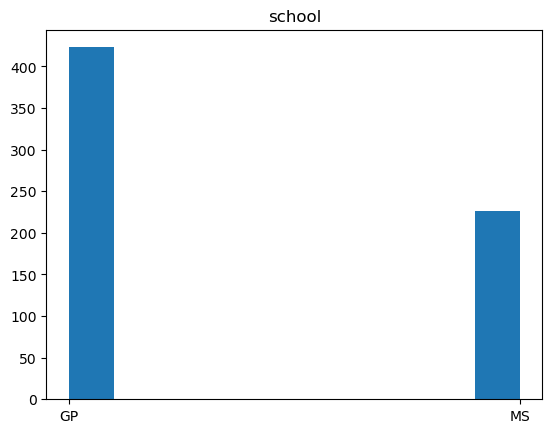

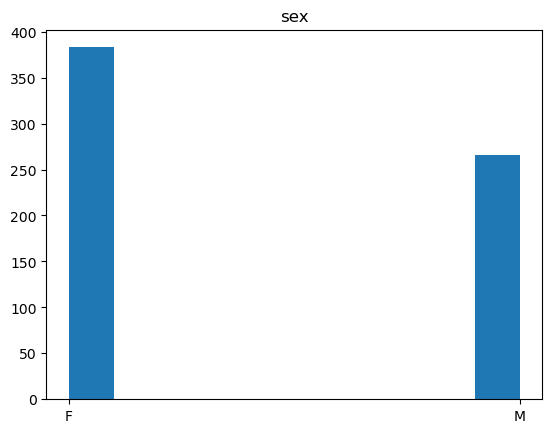

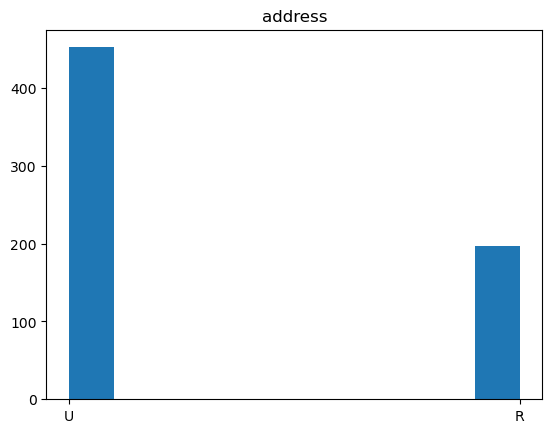

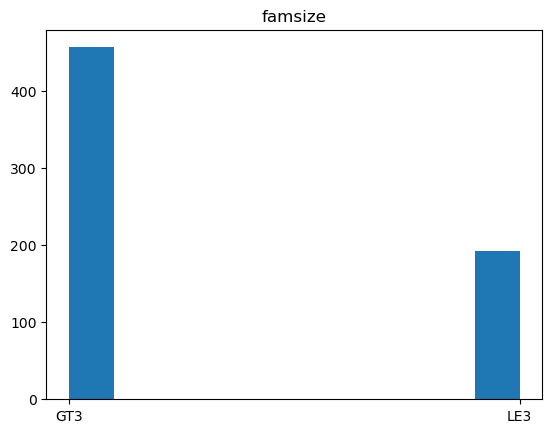

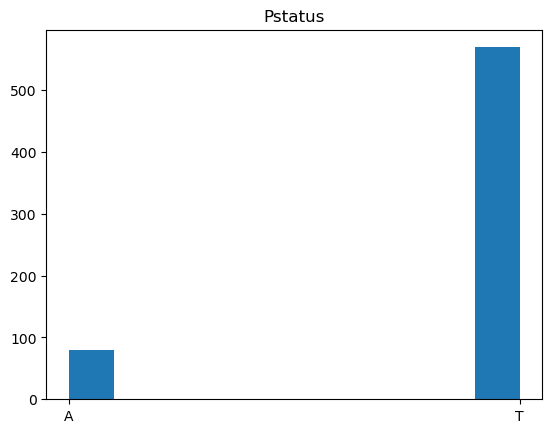

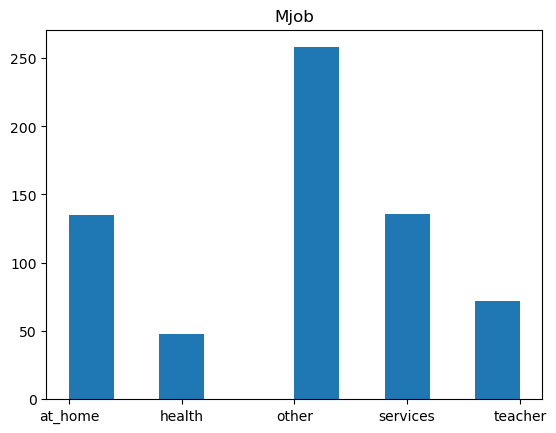

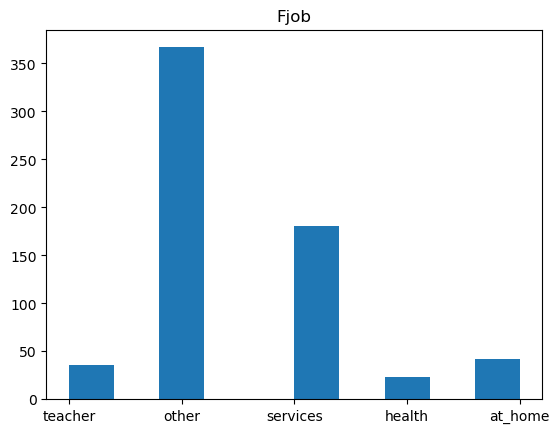

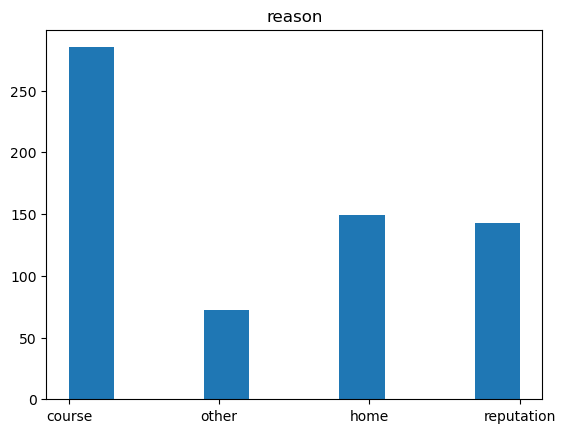

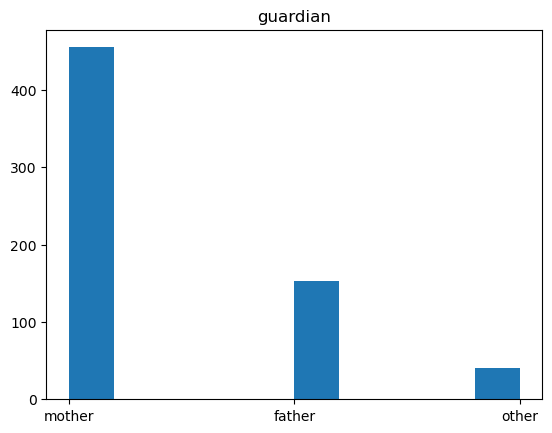

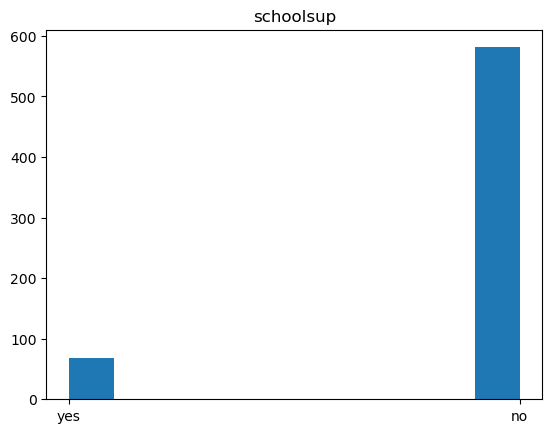

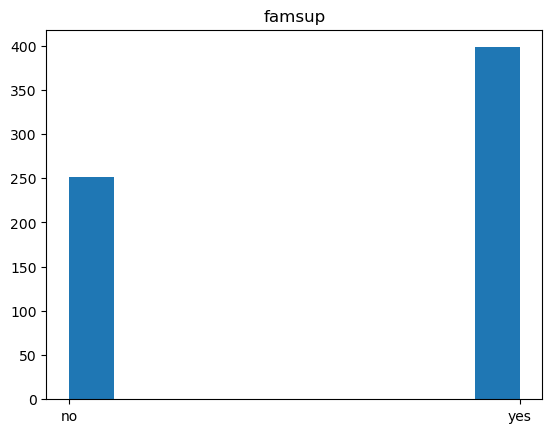

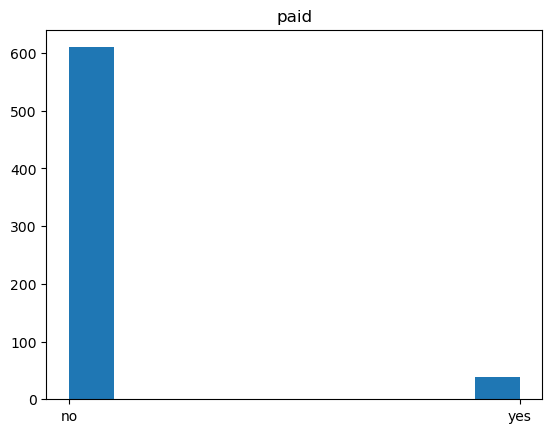

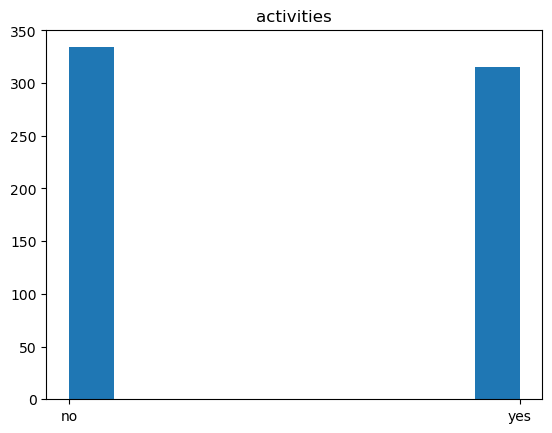

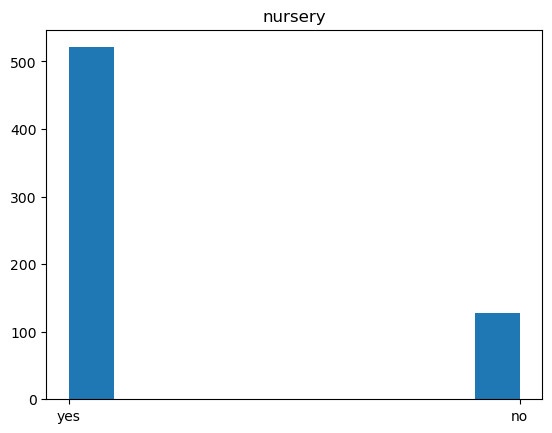

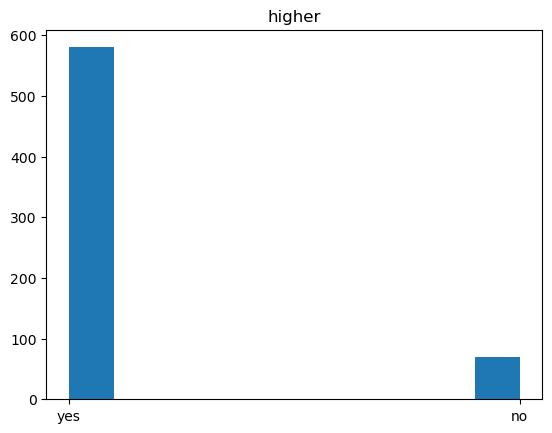

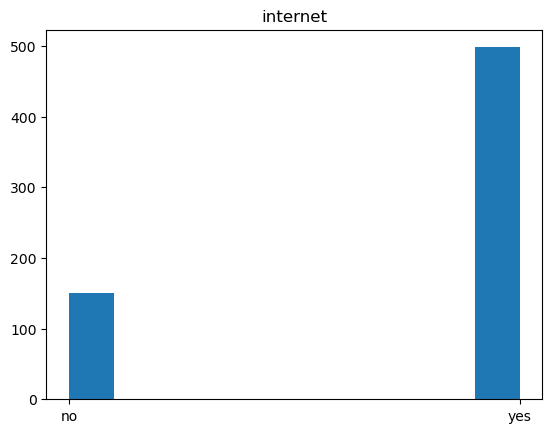

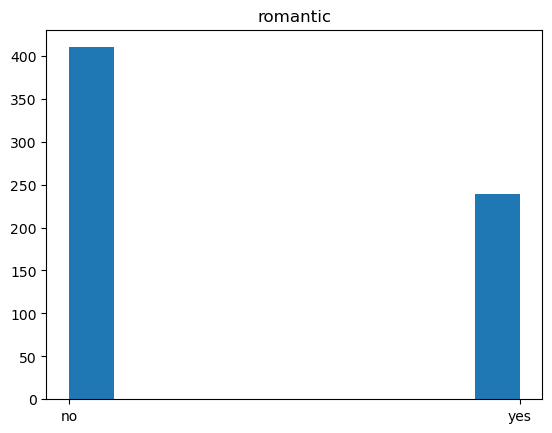

In [98]:
for columna in categoricas:
    generarHistograma(dataset_original, columna)

De acuerdo con la gráficas anteriores se puede observar que algunas variables están desbalanceadas, las cuales son: Pstatus, guardian, schoolsup, pais, nursery, higher, internet.

De esas variables se a optado por conservar guardian, nursery, higher e internet; ya que se considera que pueden ser importantes y aportar al estar en conjuto con otras variables por el tipo de situación que representan. El resto de las variables será eliminada.

##### Discretas

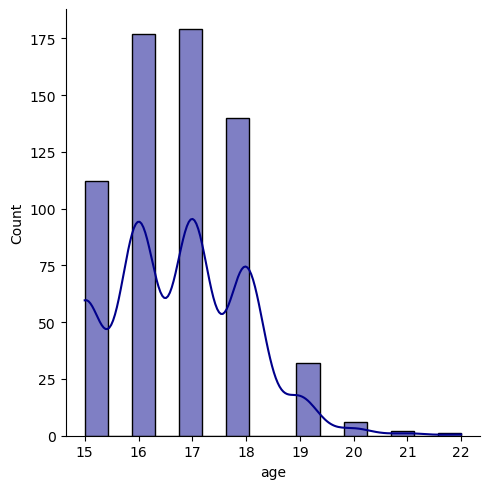

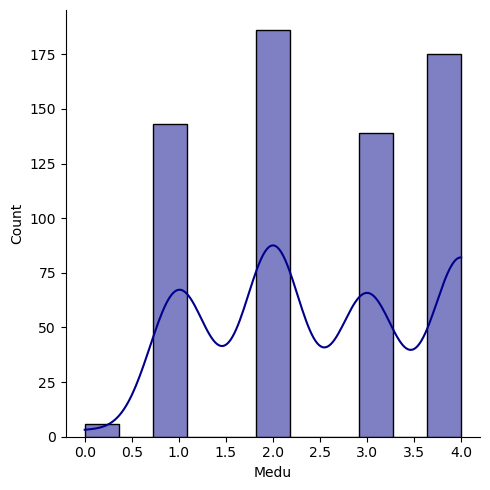

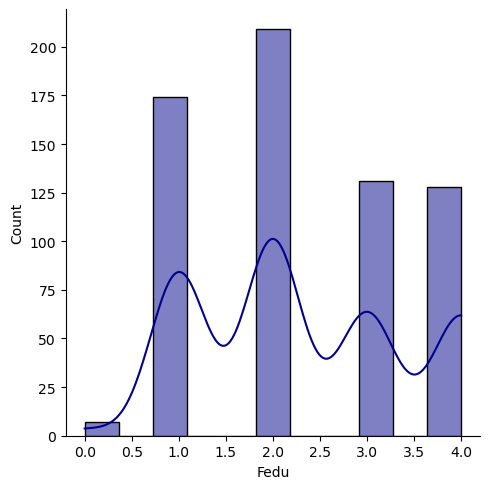

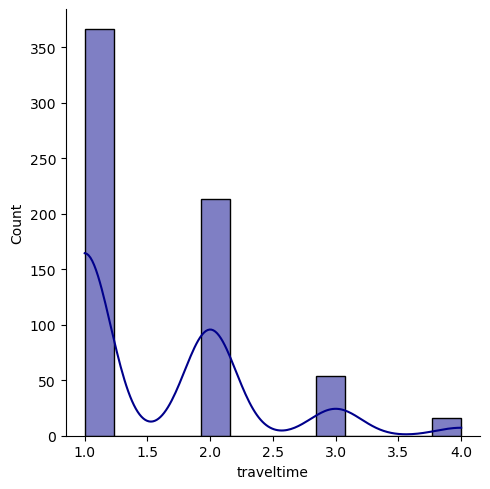

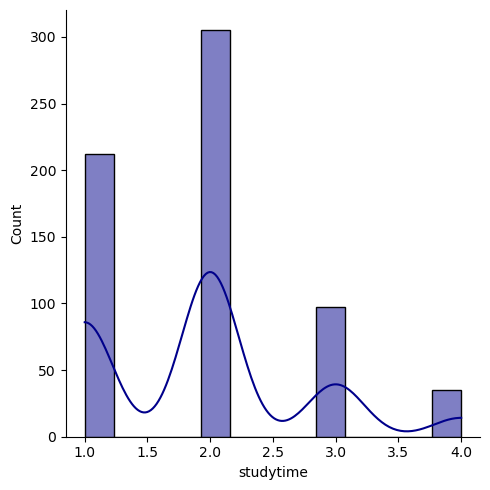

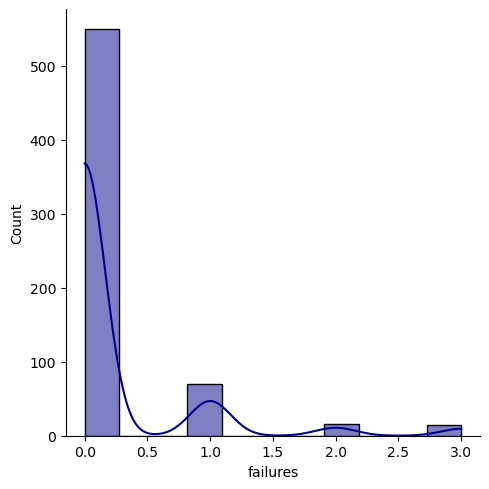

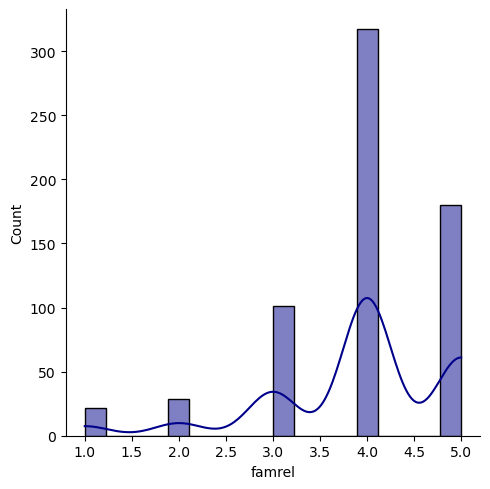

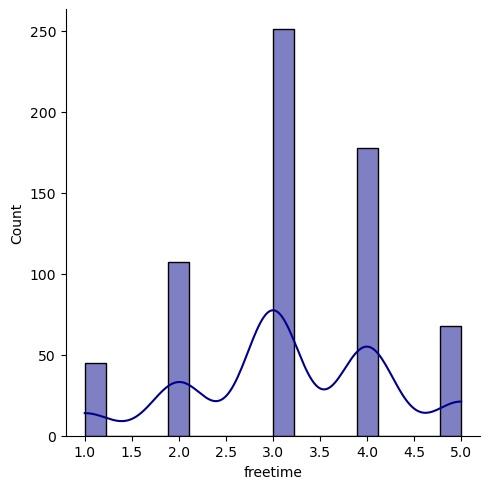

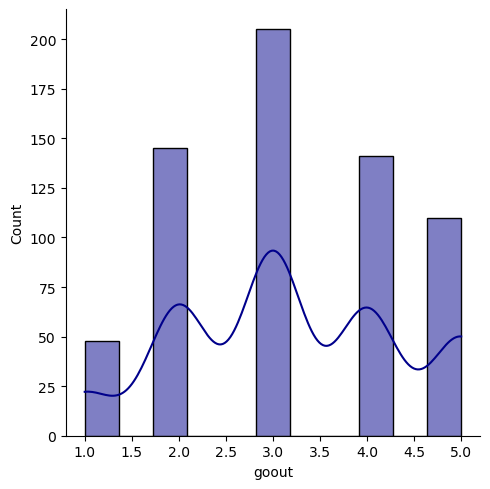

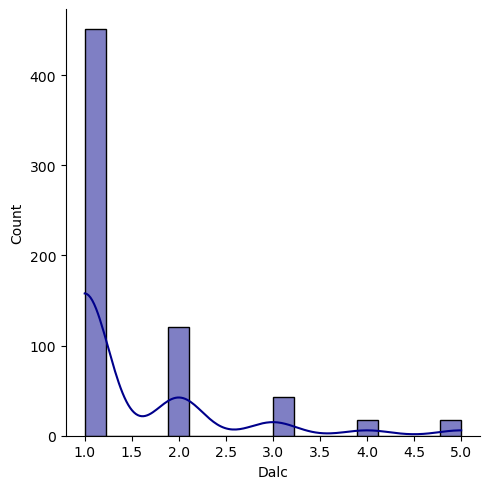

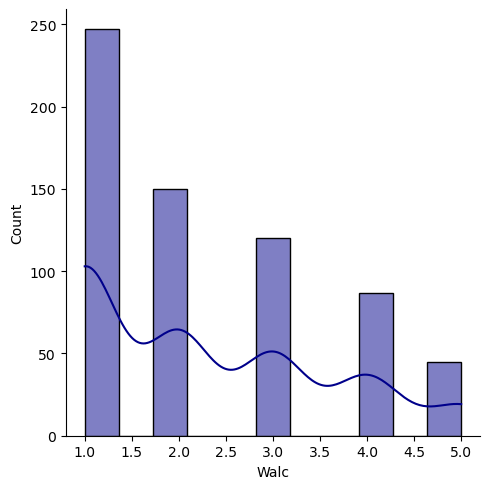

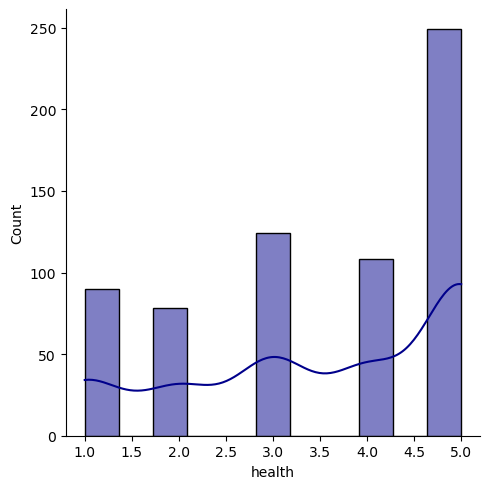

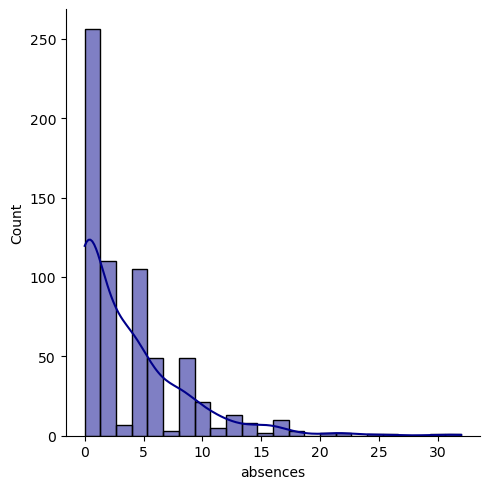

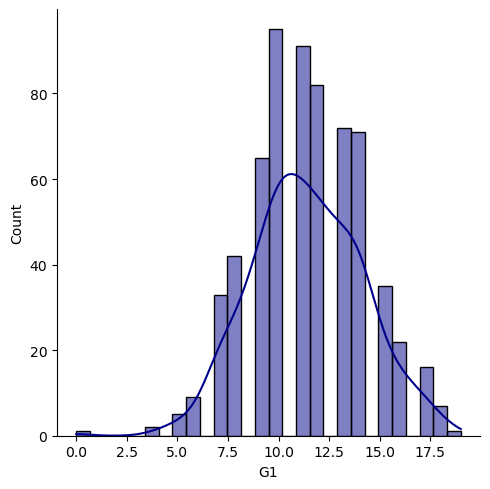

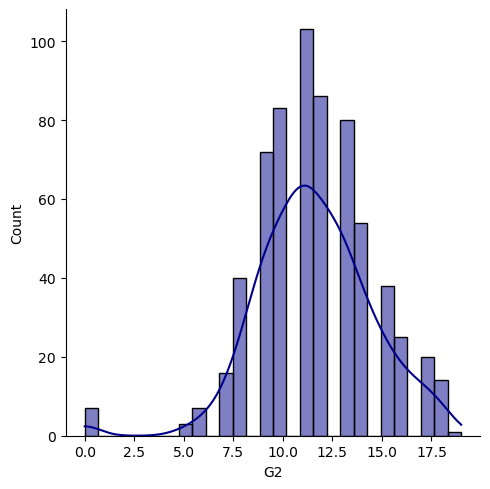

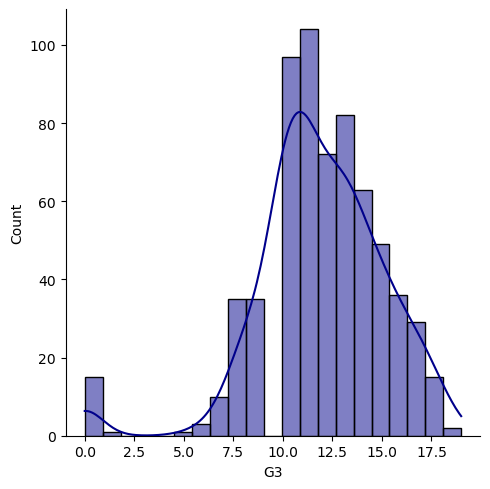

In [105]:
for columna in discretas:
    generarHistogramaDensidad(dataset_original, columna)

Las gráficas anteriores muestran que entre las variables consideradas discretas pueden existir algunas con outliers: age, Medu, Fedu, traveltime, failures, famrel, Dalc, absences, G1, G2 y G3.

A lo mejor algunas de estas pueden ser eliminar y otras puede solo determinar un tratamiento para los outliers, todo esto depende del aporte que pueda tener la variable al problema.

# Ingreniería de características

### Creando nuevo dataset con base en las conclusiones anteriores

In [283]:
dataset = dataset_original.drop(["Pstatus", "schoolsup", "paid"], axis= 1)
columnas = dataset.columns.drop(target).to_list()
columnas.append(target)
dataset = dataset[columnas]
dataset.columns = dataset.columns.str.lower()
target = target.lower()
dataset.head()

,sex,age,address,famsize,medu,fedu,mjob,fjob,reason,guardian,...,freetime,goout,dalc,walc,health,absences,g1,g2,g3,school
0,F,18,U,GT3,4,4,at_home,teacher,course,mother,...,3,4,1,1,3,4,0,11,11,GP
1,F,17,U,GT3,1,1,at_home,other,course,father,...,3,3,1,1,3,2,9,11,11,GP
2,F,15,U,LE3,1,1,at_home,other,other,mother,...,3,2,2,3,3,6,12,13,12,GP
3,F,15,U,GT3,4,2,health,services,home,mother,...,2,2,1,1,5,0,14,14,14,GP
4,F,16,U,GT3,3,3,other,other,home,father,...,3,2,1,2,5,0,11,13,13,GP


In [284]:
categoricas, discretas, continuas = obtenerVariables(dataset)

#### variables categóricas

In [285]:
dataset[categoricas]

,sex,address,famsize,mjob,fjob,reason,guardian,famsup,activities,nursery,higher,internet,romantic,school
0,F,U,GT3,at_home,teacher,course,mother,no,no,yes,yes,no,no,GP
1,F,U,GT3,at_home,other,course,father,yes,no,no,yes,yes,no,GP
2,F,U,LE3,at_home,other,other,mother,no,no,yes,yes,yes,no,GP
3,F,U,GT3,health,services,home,mother,yes,yes,yes,yes,yes,yes,GP
4,F,U,GT3,other,other,home,father,yes,no,yes,yes,no,no,GP
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
644,F,R,GT3,services,other,course,mother,no,yes,no,yes,yes,no,MS
645,F,U,LE3,teacher,services,course,mother,yes,no,yes,yes,yes,no,MS
646,F,U,GT3,other,other,course,mother,no,yes,yes,yes,no,no,MS
647,M,U,LE3,services,services,course,mother,no,no,no,yes,yes,no,MS


In [286]:
dataset[categoricas].describe()

,sex,address,famsize,mjob,fjob,reason,guardian,famsup,activities,nursery,higher,internet,romantic,school
count,649,649,649,649,649,649,649,649,649,649,649,649,649,649
unique,2,2,2,5,5,4,3,2,2,2,2,2,2,2
top,F,U,GT3,other,other,course,mother,yes,no,yes,yes,yes,no,GP
freq,383,452,457,258,367,285,455,398,334,521,580,498,410,423


A las varibles que tienen un comportamiento binario se le aplicará ordinal o label encoding.

Para mjob, fjob, reason y guardian se aplicará one hot encoding o frequency encoding. Por la cantidad de valores unicos se decide aplicar one hot encoding a la variable guardian y al resto cualquier otra.

##### target

In [287]:
map_target = {"GP": 0, "MS": 1}

In [288]:
dataset[target] = dataset[target].map(map_target)

In [289]:
dataset[categoricas].head()

,sex,address,famsize,mjob,fjob,reason,guardian,famsup,activities,nursery,higher,internet,romantic,school
0,F,U,GT3,at_home,teacher,course,mother,no,no,yes,yes,no,no,0
1,F,U,GT3,at_home,other,course,father,yes,no,no,yes,yes,no,0
2,F,U,LE3,at_home,other,other,mother,no,no,yes,yes,yes,no,0
3,F,U,GT3,health,services,home,mother,yes,yes,yes,yes,yes,yes,0
4,F,U,GT3,other,other,home,father,yes,no,yes,yes,no,no,0


##### ordinal encoding

In [290]:
ord_enc = OrdinalEncoder()

In [291]:
for columna in dataset[categoricas].columns.drop(["mjob", "fjob", "reason","guardian"]):
    if(columna != target):
        dataset[columna] = ord_enc.fit_transform(dataset[[columna]])
        dataset[columna] = dataset[columna].astype("int")

In [292]:
dataset[categoricas]

,sex,address,famsize,mjob,fjob,reason,guardian,famsup,activities,nursery,higher,internet,romantic,school
0,0,1,0,at_home,teacher,course,mother,0,0,1,1,0,0,0
1,0,1,0,at_home,other,course,father,1,0,0,1,1,0,0
2,0,1,1,at_home,other,other,mother,0,0,1,1,1,0,0
3,0,1,0,health,services,home,mother,1,1,1,1,1,1,0
4,0,1,0,other,other,home,father,1,0,1,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
644,0,0,0,services,other,course,mother,0,1,0,1,1,0,1
645,0,1,1,teacher,services,course,mother,1,0,1,1,1,0,1
646,0,1,0,other,other,course,mother,0,1,1,1,0,0,1
647,1,1,1,services,services,course,mother,0,0,0,1,1,0,1


##### One hot encoding

In [293]:
dataset = pd.get_dummies(dataset, prefix=["guardian"], columns= ["guardian"])
columnas = dataset.columns.drop(target).to_list()
columnas.append(target)
dataset = dataset[columnas]

In [294]:
dataset

,sex,age,address,famsize,medu,fedu,mjob,fjob,reason,traveltime,...,walc,health,absences,g1,g2,g3,guardian_father,guardian_mother,guardian_other,school
0,0,18,1,0,4,4,at_home,teacher,course,2,...,1,3,4,0,11,11,0,1,0,0
1,0,17,1,0,1,1,at_home,other,course,1,...,1,3,2,9,11,11,1,0,0,0
2,0,15,1,1,1,1,at_home,other,other,1,...,3,3,6,12,13,12,0,1,0,0
3,0,15,1,0,4,2,health,services,home,1,...,1,5,0,14,14,14,0,1,0,0
4,0,16,1,0,3,3,other,other,home,1,...,2,5,0,11,13,13,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
644,0,19,0,0,2,3,services,other,course,1,...,2,5,4,10,11,10,0,1,0,1
645,0,18,1,1,3,1,teacher,services,course,1,...,1,1,4,15,15,16,0,1,0,1
646,0,18,1,0,1,1,other,other,course,2,...,1,5,6,11,12,9,0,1,0,1
647,1,17,1,1,3,1,services,services,course,2,...,4,2,6,10,10,10,0,1,0,1


##### Count or Frequency encoding

In [295]:
categoricas, discretas, continuas = obtenerVariables(dataset)

In [296]:
dataset[categoricas]

,mjob,fjob,reason
0,at_home,teacher,course
1,at_home,other,course
2,at_home,other,other
3,health,services,home
4,other,other,home
...,...,...,...
644,services,other,course
645,teacher,services,course
646,other,other,course
647,services,services,course


In [297]:
map_mjob = dataset["mjob"].value_counts().to_dict()
map_fjob = dataset["fjob"].value_counts().to_dict()
map_reason = dataset["reason"].value_counts().to_dict()

dataset["mjob"] = dataset["mjob"].map(map_mjob)
dataset["fjob"] = dataset["fjob"].map(map_fjob)
dataset["reason"] = dataset["reason"].map(map_reason)

In [298]:
dataset[categoricas]

,mjob,fjob,reason
0,135,36,285
1,135,367,285
2,135,367,72
3,48,181,149
4,258,367,149
...,...,...,...
644,136,367,285
645,72,181,285
646,258,367,285
647,136,181,285


In [299]:
categoricas, discretas, continuas = obtenerVariables(dataset)

In [300]:
categoricas

[]

##### Outliers

Del análisis de la gráficas se detectó los siguientes posibles outliers en: age, medu, fedu, traveltime, failures, famrel, dalc, absences, g1, g2 y g3.

In [301]:
dataset[["age", "medu", "fedu", "traveltime", "failures", "famrel", "dalc", "absences", "g1", "g2", "g3"]]

,age,medu,fedu,traveltime,failures,famrel,dalc,absences,g1,g2,g3
0,18,4,4,2,0,4,1,4,0,11,11
1,17,1,1,1,0,5,1,2,9,11,11
2,15,1,1,1,0,4,2,6,12,13,12
3,15,4,2,1,0,3,1,0,14,14,14
4,16,3,3,1,0,4,1,0,11,13,13
...,...,...,...,...,...,...,...,...,...,...,...
644,19,2,3,1,1,5,1,4,10,11,10
645,18,3,1,1,0,4,1,4,15,15,16
646,18,1,1,2,0,1,1,6,11,12,9
647,17,3,1,2,0,2,3,6,10,10,10


##### age

In [302]:
dataset["age"].value_counts()

17    179
16    177
18    140
15    112
19     32
20      6
21      2
22      1
Name: age, dtype: int64

Se van a eliminar las edades de 20 a 22 ya que en comparación con las otras edades y podemos limitar el modelo a la edad máxima de 19

In [303]:
# elimina outliers 
outliers = dataset[(dataset["age"] > 19)].index
dataset.drop(outliers, inplace= True)

##### medu

In [304]:
dataset["medu"].value_counts()

2    185
4    174
1    139
3    136
0      6
Name: medu, dtype: int64

Se puede eliminar categoria 0 ya que existe mucha diferencia con el resto.

In [305]:
# elimina outliers 
outliers = dataset[(dataset["medu"] == 0)].index
dataset.drop(outliers, inplace= True)

##### fedu

In [306]:
dataset["fedu"].value_counts()

2    205
1    167
3    130
4    127
0      5
Name: fedu, dtype: int64

Se puede eliminar categoria 0 ya que existe mucha diferencia con el resto.

In [307]:
# elimina outliers 
outliers = dataset[(dataset["fedu"] == 0)].index
dataset.drop(outliers, inplace= True)

##### traveltime

In [308]:
dataset["traveltime"].value_counts()

1    360
2    200
3     53
4     16
Name: traveltime, dtype: int64

Se considera la posibilidad de que esta variable en conjunto con otra puedan aportar al modelo ya que el tiempo de viaje entre la case y la escuela para esas categorías es bastante. Aunque tamibén existe la posibilidad de una distorción al modelo.

In [309]:
# elimina outliers 
#outliers = dataset[(dataset["traveltime"] > 2)].index
#dataset.drop(outliers, inplace= True)

##### failures

In [310]:
dataset["failures"].value_counts()

0    538
1     66
3     13
2     12
Name: failures, dtype: int64

Por el comportamiento de esta variable y lo que representa en el dataset se considera mejor eliminarla debido al desbalance.

In [311]:
# elimina variable 
dataset.drop(["failures"], axis = 1, inplace = True)

##### famrel

In [312]:
dataset["famrel"].value_counts()

4    310
5    176
3     94
2     28
1     21
Name: famrel, dtype: int64

Auenque puede haber un desbalance por lo que representa la variable se opta por no aplicar un tratamiento.

In [313]:
# elimina outliers 
#outliers = dataset[(dataset["famrel"] == 0)].index
#dataset.drop(outliers, inplace= True)

##### dalc

In [314]:
dataset["dalc"].value_counts()

1    438
2    117
3     42
4     17
5     15
Name: dalc, dtype: int64

Se decide no aplicar ningún tratamiento.

In [315]:
# elimina outliers 
#outliers = dataset[(dataset["dalc"] == 0)].index
#dataset.drop(outliers, inplace= True)

##### absences

In [316]:
dataset["absences"].value_counts()

0     234
2     110
4      92
6      49
8      39
10     21
1      11
16     10
12     10
5      10
14      8
9       7
3       7
11      5
18      3
7       3
15      2
22      2
30      1
21      1
26      1
24      1
13      1
32      1
Name: absences, dtype: int64

Por el comportamiento y lo que representa esta variable se decide eliminarla

In [317]:
# elimina variable 
dataset.drop(["absences"], axis = 1, inplace = True)

##### G1, G2, G3

In [318]:
dataset["g1"].value_counts()

10    93
11    86
12    79
13    72
14    69
9     61
8     40
15    35
7     32
16    21
17    16
6      9
18     7
5      5
4      2
0      1
19     1
Name: g1, dtype: int64

In [319]:
dataset["g2"].value_counts()

11    98
12    82
13    80
10    80
9     69
14    53
8     39
15    36
16    25
17    19
7     16
18    14
6      7
0      7
5      3
19     1
Name: g2, dtype: int64

In [320]:
dataset["g3"].value_counts()

11    100
10     91
13     81
12     68
14     63
15     46
16     36
9      35
8      35
17     29
0      15
18     14
7      10
6       3
19      2
1       1
Name: g3, dtype: int64

In [321]:
dataset[["g1", "g2", "g3"]].value_counts()

g1  g2  g3
10  11  11    19
    10  10    15
13  13  13    14
11  11  11    13
10  11  12    12
              ..
9   7   9      1
        8      1
        6      1
    0   0      1
19  17  18     1
Length: 188, dtype: int64

Por lo que representan estas variables se decide no aplicar ningún tratamiento.

# Modelo

##### Separación del dataset

In [322]:
dataset

,sex,age,address,famsize,medu,fedu,mjob,fjob,reason,traveltime,...,dalc,walc,health,g1,g2,g3,guardian_father,guardian_mother,guardian_other,school
0,0,18,1,0,4,4,135,36,285,2,...,1,1,3,0,11,11,0,1,0,0
1,0,17,1,0,1,1,135,367,285,1,...,1,1,3,9,11,11,1,0,0,0
2,0,15,1,1,1,1,135,367,72,1,...,2,3,3,12,13,12,0,1,0,0
3,0,15,1,0,4,2,48,181,149,1,...,1,1,5,14,14,14,0,1,0,0
4,0,16,1,0,3,3,258,367,149,1,...,1,2,5,11,13,13,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
644,0,19,0,0,2,3,136,367,285,1,...,1,2,5,10,11,10,0,1,0,1
645,0,18,1,1,3,1,72,181,285,1,...,1,1,1,15,15,16,0,1,0,1
646,0,18,1,0,1,1,258,367,285,2,...,1,1,5,11,12,9,0,1,0,1
647,1,17,1,1,3,1,136,181,285,2,...,3,4,2,10,10,10,0,1,0,1


In [323]:
X = dataset.iloc[:, :-1]
y = dataset[target]

In [324]:
X.head()

,sex,age,address,famsize,medu,fedu,mjob,fjob,reason,traveltime,...,goout,dalc,walc,health,g1,g2,g3,guardian_father,guardian_mother,guardian_other
0,0,18,1,0,4,4,135,36,285,2,...,4,1,1,3,0,11,11,0,1,0
1,0,17,1,0,1,1,135,367,285,1,...,3,1,1,3,9,11,11,1,0,0
2,0,15,1,1,1,1,135,367,72,1,...,2,2,3,3,12,13,12,0,1,0
3,0,15,1,0,4,2,48,181,149,1,...,2,1,1,5,14,14,14,0,1,0
4,0,16,1,0,3,3,258,367,149,1,...,2,1,2,5,11,13,13,1,0,0


In [325]:
y.head()

0    0
1    0
2    0
3    0
4    0
Name: school, dtype: int64

#### Estandarización de variables

In [326]:
scaler = StandardScaler()
scaled_features = scaler.fit_transform(X.values)
scaled_features

array([[-0.83118001,  1.14696505,  0.65787675, ..., -0.56204945,
         0.64302655, -0.23530645],
       [-0.83118001,  0.27142984,  0.65787675, ...,  1.77920289,
        -1.55514574, -0.23530645],
       [-0.83118001, -1.47964059,  0.65787675, ..., -0.56204945,
         0.64302655, -0.23530645],
       ...,
       [-0.83118001,  1.14696505,  0.65787675, ..., -0.56204945,
         0.64302655, -0.23530645],
       [ 1.20310881,  0.27142984,  0.65787675, ..., -0.56204945,
         0.64302655, -0.23530645],
       [ 1.20310881,  1.14696505, -1.52004155, ..., -0.56204945,
         0.64302655, -0.23530645]])

In [327]:
scaled_features.shape

(629, 29)

## PCA - Regresión Logística

In [328]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, 
                                                    random_state=2022, shuffle=True)

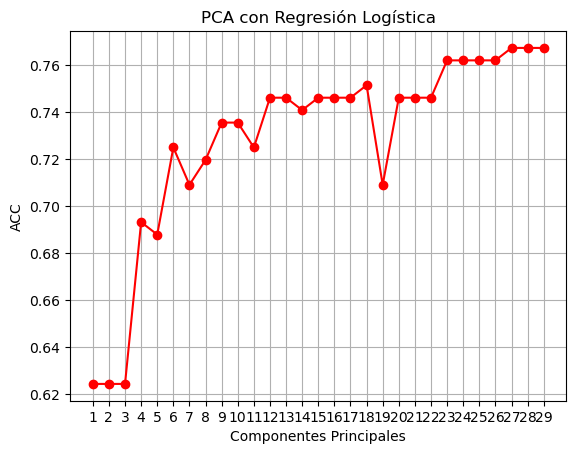

In [354]:
pcas = np.arange(1, 30)
accs = []

for pca in pcas:
    #Calculo PCA
    pca = PCA(n_components=pca)
    X_train_pca = pca.fit_transform(X_train)
    X_test_pca = pca.transform(X_test)
    
    #entrenamiento del modelo
    rlog_clf_pca = LogisticRegression(random_state=0, solver='lbfgs', max_iter=1000)
    rlog_clf_pca.fit(X_train_pca, y_train)
    preds_rlog_pca = rlog_clf_pca.predict(X_test_pca)
    acc = accuracy_score(y_test, preds_rlog_pca)
    accs.append(acc)

plt.grid()
plt.plot(pcas, accs, "-o", color="red")
plt.title("PCA con Regresión Logística")
plt.xlabel("Componentes Principales")
plt.ylabel("ACC")
plt.xticks(pcas)
plt.show()

De acuerdo con el gráfico, el mejor accuracy se obtiene con 27 componentes.

##### PCA - Regresión Logística. PCA = 27

In [355]:
pca = PCA(n_components=27)
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)
rlog_clf_pca = LogisticRegression(random_state=0, solver='lbfgs', max_iter=1000 )
rlog_clf_pca.fit(X_train_pca, y_train)
preds_rlog_pca = rlog_clf_pca.predict(X_test_pca)
accuracy_score(y_test, preds_rlog_pca)

0.7671957671957672

El accuracy del modelo fue de 0.767196

In [363]:
test = pd.DataFrame({"target": y_test, "predicción": preds_rlog_pca})
test

,target,predicción
71,0,0
251,0,0
638,1,0
239,0,1
110,0,0
...,...,...
197,0,0
186,0,0
179,0,0
117,0,0


In [357]:
np.sum(pca.explained_variance_ratio_)

0.9999980263481801

## Conlusiones

Para el modelo se aplicó PCA y se obtuvo que la mejor opción era utilizando 27 componentes principales, el no lograr en mayor reducción esta directamente relacionado con la data, al ser altamente sensible a outliers, los criterios aplicados en el proceso ingeniería de características no fueron o provocaron los mejores resultados.

Aunque se utilicen varios compenentes, se logró reducir comparado con la cantidad inicial. También se logró encontrar el mejor modelo con bastante eficiencia, esto quiere decir que con un mejor proceso de ingeniería de características y una mejor colección de datos se puede lograr la disminución de los componentes principales